# 5: Data types and missing values

In this week's tutorial, we will go over some common data types that you will see in pandas as well as learn how to deal with missing values.

We will be using the kaggle house prices dataset which you can download [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

We aim to investigate how the different features of a house affect its final sale price. Each row of the dataset represents a single house and its many characteristics. The target (response) variable is the sale price.

## Import pandas and numpy

In [2]:
import pandas as pd
import numpy as np
#from pandas.core.computation.check import NUMEXPR_INSTALLED

## Load data

In [3]:
data = pd.read_csv("train_house-prices-advanced-regression-techniques.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: 'train_house-prices-advanced-regression-techniques.csv'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
data["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

## Data types

We can use pandas function [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) to grab the data type of every column in a data frame.

In [ ]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Alternatively, if we only want to consider a particular column, we can do this.

In [ ]:
# Check the data type of the SalePrice column

data['SalePrice'].dtype

dtype('int64')

What are the most common data types that you will see in pandas?

- int64 (integer)
- float64 (floating point number)
- object (string)
- datetime (datetime)
- bool (true or false)


We can convert a column of one type into another using the [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) function.

In [ ]:
# Convert the SalePrice column into float64 data type
data['SalePrice'].astype('float64')

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [ ]:
data['SalePrice'].astype('bool')

0       True
1       True
2       True
3       True
4       True
        ... 
1455    True
1456    True
1457    True
1458    True
1459    True
Name: SalePrice, Length: 1460, dtype: bool

In [ ]:
data["SalePrice"].dtype

dtype('int64')

## Locating missing values

First let's recall how we can figure out how many null values are there in our dataframe.

In [ ]:
# How many null values are there in our dataframe?

data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

This is sometimes difficult to see when we have too many columns. One of my favourite ways to visualise null values is via the missingno.matrix function.

<Axes: >

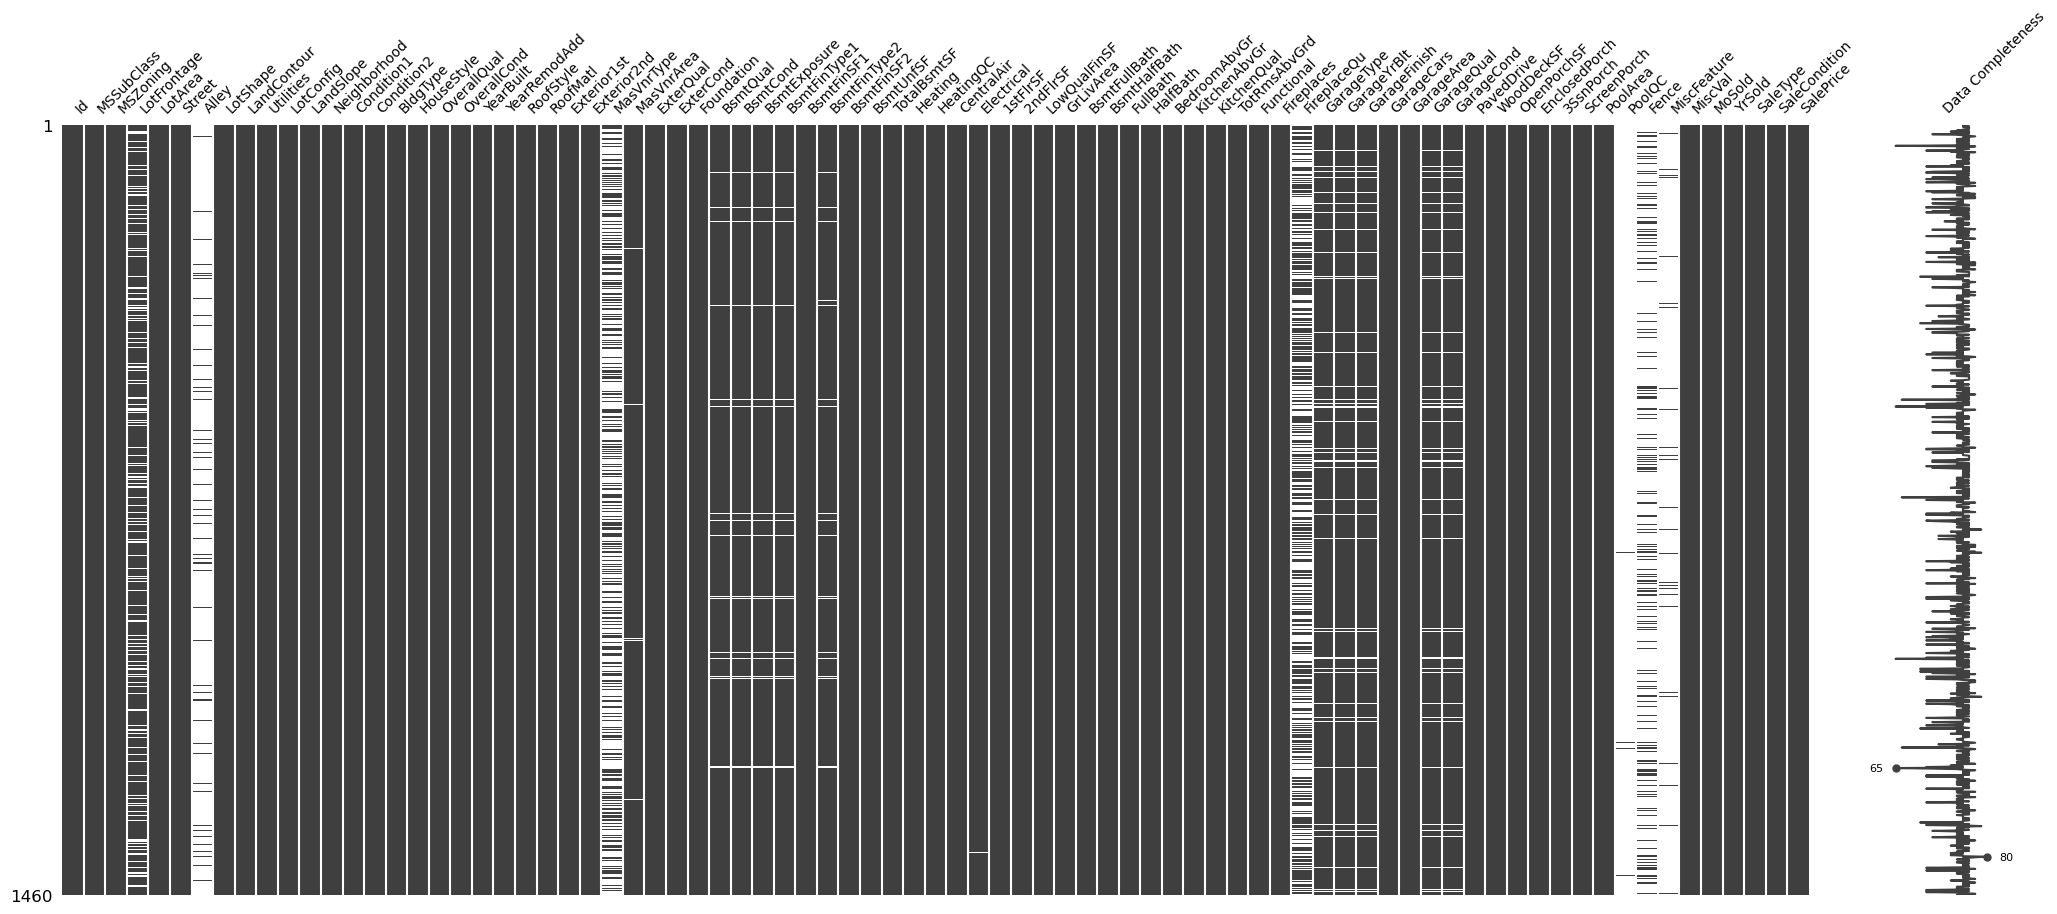

In [ ]:
# Import missingno library
#!pip install missingno
import missingno

# Visualise null values
missingno.matrix(data, labels= True, fontsize= 10)

<Axes: >

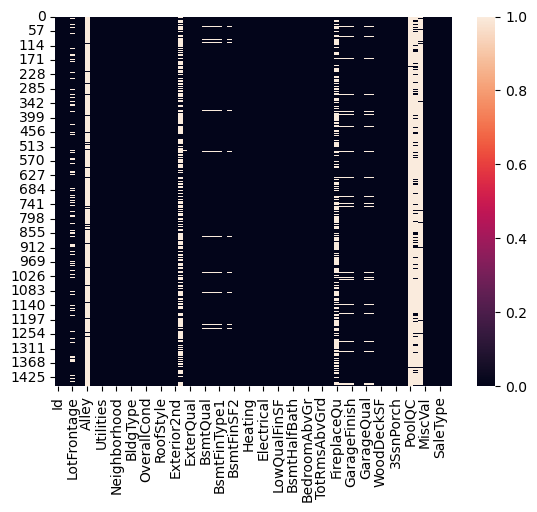

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data.iloc[:, 6].isnull().sum()

1369

In [ ]:
x = data.iloc[:,-9:-6]

In [ ]:
x.isnull().sum()

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [ ]:
data["MasVnrType"].isnull().sum()

872

In [ ]:
data.iloc[:, 25]

0       BrkFace
1           NaN
2       BrkFace
3           NaN
4       BrkFace
         ...   
1455        NaN
1456      Stone
1457        NaN
1458        NaN
1459        NaN
Name: MasVnrType, Length: 1460, dtype: object

In [ ]:
data.iloc[:,6]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: Alley, Length: 1460, dtype: object

In [ ]:
data["Alley"].isnull().sum()

1369

In [ ]:
data.iloc[:,-9:-6].isnull().sum()

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [ ]:
data1= data.iloc[:,-9:-6]

In [ ]:
data1.isnull().sum()

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [ ]:
data.Fence.describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

It is also helpful to compute the percentage of the values in our dataset that are missing.

We can do this by dividing the total number of missing cells by the total number of cells in the dataframe.

In [ ]:
# Compute total number of cells in dataframe and cells with missing values
total_cells = np.multiply(data.shape[0], data.shape[1]) #1460 * 81 = 118260 records or entity
total_missing = data.isnull().sum().sum()
print(total_cells)
print(total_missing)

# Compute percentage
percentage_missing = (total_missing / total_cells)* 100
print(percentage_missing)

118260
7829
6.620158971757145


## Dealing with missing values

There are mainly two ways to deal with missing data.

1. Drop the rows or columns which contain missing data 
2. Replace missing data with substituted values also known as imputation

Both methods have their own individual pros and cons. Which of the two methods you use will be highly dependent on your data as well as the nature of the problem you are trying to solve. If you are working on detailed piece of analysis, this is where you would take the time to really understand each column to figure out the best strategy to handle those missing values.

Generally speaking, dropping data is much easier and straightforward to implement but it does come at the expense of removing potentially useful information from our dataset. This will adversely affect model performance which then leads to inaccurate model predictions.

On the other hand, choosing the best way to impute or replace those missing values require more time, consideration and experience. I will briefly touch upon the different ways to impute missing values in the later part of this notebook.

## Method 1: Drop rows or columns with missing values

If you are in a hurry or don't have a reason to figure out why your values are missing, one option is to remove rows or columns that contain missing values. However, this is not the best approach in most cases because we might lose potentially useful information in our dataset.

Let's see how we can drop rows and columns with missing values using the [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function. 

In [ ]:
# Drop rows with missing values
data.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Yikes, it appears that we have dropped all the rows in our dataframe. This is not good. 

Ideally, we would only remove rows if we have a large number of training examples and if the rows with missing data is not a high number. In our example, all the rows have at least one missing feature therefore dropping rows with missing data is not a good strategy to use.

Maybe we should remove columns with missing values instead.

In [ ]:
# Drop columns with missing values

col_with_na_dropped = data.dropna(axis = 1)
col_with_na_dropped.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
col_with_na_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [ ]:
# How much data did we lose?

print("Number of columns in original dataset: ", data.shape[1]) #(n. of rows , n. of columns),, (0,1)
print("Number of columns left after dropping: ", col_with_na_dropped.shape[1])
difference = data.shape[1] - col_with_na_dropped.shape[1]
print("We have dropped a total of %d columns." ,difference )

Number of columns in original dataset:  81
Number of columns left after dropping:  62
We have dropped a total of %d columns. 19


We are dropping a substantial amount of features from our dataset, almost a quarter! 

Features in our example are the characteristics that describe the house. If we remove features that are significant in explaining the sale price of the house, our model will not be able to make accurate predictions. 

In an ideal scenario, it is only safe to drop a column if there is significant random missing data present in a column and if we have reasons to believe that the column is unimportant in predicting our target variable. 

Let's have a closer look at the features that we are dropping. 

In [ ]:
data.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [ ]:
print(data.columns[data.isnull().any()])

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [ ]:
col_with_na = data.columns[data.isnull().any()]
list(col_with_na)

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
col_with_na = data.loc[:,['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure',
'BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual',
'GarageCond','PoolQC','Fence','MiscFeature']]

In [ ]:
col_with_na.isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
col_with_na.isnull().mean() *100

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [ ]:
data.drop(columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
data.dropna(subset=['MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
 'Electrical' ,'GarageYrBlt','GarageFinish','GarageCond'])


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
data_dropna = data.loc[:, ['MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
 'Electrical' ,'GarageYrBlt','GarageFinish','GarageCond']]
data_dropna.dropna()

,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageYrBlt,GarageFinish,GarageCond
0,196.0,Gd,TA,No,GLQ,Unf,SBrkr,2003.0,RFn,TA
1,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,1976.0,RFn,TA
2,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,2001.0,RFn,TA
3,0.0,TA,Gd,No,ALQ,Unf,SBrkr,1998.0,Unf,TA
4,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,2000.0,RFn,TA
...,...,...,...,...,...,...,...,...,...,...
1455,0.0,Gd,TA,No,Unf,Unf,SBrkr,1999.0,RFn,TA
1456,119.0,Gd,TA,No,ALQ,Rec,SBrkr,1978.0,Unf,TA
1457,0.0,TA,Gd,No,GLQ,Unf,SBrkr,1941.0,RFn,TA
1458,0.0,TA,TA,Mn,GLQ,Rec,FuseA,1950.0,Unf,TA


In [ ]:
'''
data.drop(columns=['Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
 'Electrical','FireplaceQu','GarageYrBlt','GarageFinish','GarageCond','PoolQC','Fence','MiscFeature'])
'''

"\ndata.drop(columns=['Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',\n 'Electrical','FireplaceQu','GarageYrBlt','GarageFinish','GarageCond','PoolQC','Fence','MiscFeature'])\n"

To iterate, only drop rows and columns if you have significant amount missing data or that the data is not important in predicting the target variable. 

Now let's look at a better approach for dealing with missing data via imputation.

## Method 2: Imputation ( Filling in missing values )

There are a couple of ways to impute missing data that is subjective to the situation. 

In this section, I will go through the two of the most common technique to fill missing data:

1. Using mean or median values (for numerical variables)
2. Using mode or zero (for categorical variables)

Numerical variables are continuous random variable like height, age, total sales whereas categorical variables are discrete random variables like yes or no, pass or fail, small, medium or large etc.

# Simple Imputation
The main function to use here is the [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function. 

In [ ]:
# Suppose we want to fill missing data in the LotFrontage column 
# First let's examine the data type

data['LotFrontage'].dtype

dtype('float64')

In [ ]:
data['LotFrontage'].head(20)

0     65.0
1     80.0
2     68.0
3     60.0
4     84.0
5     85.0
6     75.0
7      NaN
8     51.0
9     50.0
10    70.0
11    85.0
12     NaN
13    91.0
14     NaN
15    51.0
16     NaN
17    72.0
18    66.0
19    70.0
Name: LotFrontage, dtype: float64

In [ ]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Row number 8 has missing value.

Suppose we want to fill all missing data in that column with the median.

In [ ]:
# Compute median
data['LotFrontage'].median()

69.0

In [ ]:
from sklearn.impute import KNNImputer
#sklean is a machine learning library 
imputer = KNNImputer(n_neighbors=4)
data['LotFrontage']= imputer.fit_transform(data[['LotFrontage']])
data['LotFrontage'].head(20)

0     65.000000
1     80.000000
2     68.000000
3     60.000000
4     84.000000
5     85.000000
6     75.000000
7     70.049958
8     51.000000
9     50.000000
10    70.000000
11    85.000000
12    70.049958
13    91.000000
14    70.049958
15    51.000000
16    70.049958
17    72.000000
18    66.000000
19    70.000000
Name: LotFrontage, dtype: float64

In [ ]:
# Impute missing data in LotFrontage with median

data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['LotFrontage'].head(20)

0     65.000000
1     80.000000
2     68.000000
3     60.000000
4     84.000000
5     85.000000
6     75.000000
7     70.049958
8     51.000000
9     50.000000
10    70.000000
11    85.000000
12    70.049958
13    91.000000
14    70.049958
15    51.000000
16    70.049958
17    72.000000
18    66.000000
19    70.000000
Name: LotFrontage, dtype: float64

# Advanced Imputation  
using Machine Learning Model called K-NN Algorithm

In [ ]:
from sklearn.impute import KNNImputer
#sklean is a machine learning library 
imputer = KNNImputer(n_neighbors=4)
data['LotFrontage']= imputer.fit_transform(data[['LotFrontage']])
data['LotFrontage'].head(20)

0     65.000000
1     80.000000
2     68.000000
3     60.000000
4     84.000000
5     85.000000
6     75.000000
7     70.049958
8     51.000000
9     50.000000
10    70.000000
11    85.000000
12    70.049958
13    91.000000
14    70.049958
15    51.000000
16    70.049958
17    72.000000
18    66.000000
19    70.000000
Name: LotFrontage, dtype: float64

Row number 8 has been filled with the median of the LotFrontage column that is 69.

Now let's look at an example of a categorical variable like GarageType.

In [ ]:
# Check data type of GarageType column

data['GarageType'].dtype

dtype('O')

In [ ]:
data['GarageType'].describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

In [ ]:
# Let's see the value counts in that column including the nulll value

data['GarageType'].value_counts(dropna = False)

GarageType
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

The most frequent observation is Attchd.

Suppose we want to fill the missing data with this observation.

In [ ]:
data['GarageType'].mode()[0]

'Attchd'

In [ ]:
data['GarageType'].tail(10)

1450        NaN
1451     Attchd
1452    Basment
1453        NaN
1454     Attchd
1455     Attchd
1456     Attchd
1457     Attchd
1458     Attchd
1459     Attchd
Name: GarageType, dtype: object

In [ ]:
data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageType'].tail(10)

1450     Attchd
1451     Attchd
1452    Basment
1453     Attchd
1454     Attchd
1455     Attchd
1456     Attchd
1457     Attchd
1458     Attchd
1459     Attchd
Name: GarageType, dtype: object

The missing values have now been replaced with the mode.

We can also fill the missing data with any number or text that we like. Let's consider the GarageQual feature.

Suppose we want to replace the null values with the word 'Unknown'.

In [ ]:
data['GarageQual'].value_counts(dropna = False)

GarageQual
TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: count, dtype: int64

In [ ]:
data['GarageQual'] = data['GarageQual'].fillna('Unknown')
data['GarageQual'].value_counts(dropna = False)

GarageQual
TA         1311
Unknown      81
Fa           48
Gd           14
Ex            3
Po            3
Name: count, dtype: int64

Notice how the NaN value has been replaced with the word Unknown.

There are other more sophisticated methods of imputing missing data like using other features that are correlated to help determine the appropriate substitute value. However, I won't be covering those concepts in this tutorial but if you are interested, you can check out this [article](https://medium.com/x8-the-ai-community/handling-missing-values-in-data-54e1dc77e24f).

In [ ]:
data.to_csv("E:\Academic\Work\My  private work\Interimediate Python\pandas-tutorial-master\modified_file.csv") 